<a href="https://colab.research.google.com/github/abhay-2108/Stock-Prediction-using-Random-Forest-and-ANN/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = 'AMD.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [ ]:
data.shape

(10361, 7)

#### Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10361 entries, 0 to 10360
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10361 non-null  object 
 1   Open       10361 non-null  float64
 2   High       10361 non-null  float64
 3   Low        10361 non-null  float64
 4   Close      10361 non-null  float64
 5   Adj Close  10361 non-null  float64
 6   Volume     10361 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 566.7+ KB


In [ ]:
# check for missing values
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# checking for duplicate values in dataset
data.duplicated().sum()

0

#### EDA

###### Independent features - open,high,low, volume ------ target features - Adj close

In [ ]:
data.drop('Date', axis = 1,inplace = True)

<Axes: >

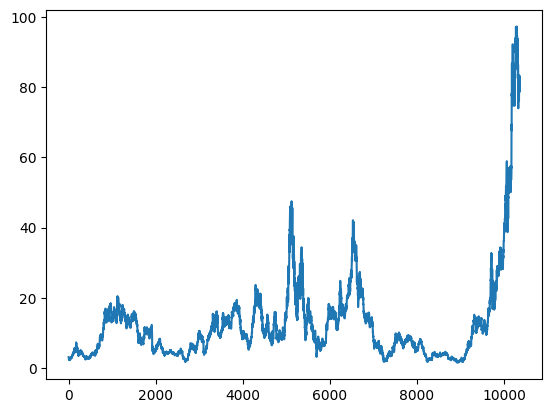

In [ ]:
# Target Feature
data['Adj Close'].plot()


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10361.000000,10361.000000,10361.000000,10361.000000,10361.000000,1.036100e+04
mean,12.526124,13.117603,12.553819,12.837204,12.837204,1.551078e+07
std,13.455692,13.458076,12.919785,13.198687,13.198687,2.471813e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.680000,5.187500,4.937500,5.062500,5.062500,1.142400e+06
50%,9.281250,9.500000,9.062500,9.281250,9.281250,5.920200e+06
75%,15.125000,15.400000,14.810000,15.080000,15.080000,1.908710e+07
max,97.860001,99.230003,96.250000,97.250000,97.250000,3.250584e+08


In [ ]:
Independent_feature = data[['Open','High','Low','Volume']]
Target = data[['Adj Close']]

In [ ]:
Independent_feature.describe()

,Open,High,Low,Volume
count,10361.000000,10361.000000,10361.000000,1.036100e+04
mean,12.526124,13.117603,12.553819,1.551078e+07
std,13.455692,13.458076,12.919785,2.471813e+07
min,0.000000,1.690000,1.610000,0.000000e+00
25%,4.680000,5.187500,4.937500,1.142400e+06
50%,9.281250,9.500000,9.062500,5.920200e+06
75%,15.125000,15.400000,14.810000,1.908710e+07
max,97.860001,99.230003,96.250000,3.250584e+08


In [ ]:
Independent_feature.corr()

,Open,High,Low,Volume
Open,1.000000,0.995644,0.995584,0.349728
High,0.995644,1.000000,0.999484,0.345278
Low,0.995584,0.999484,1.000000,0.338663
Volume,0.349728,0.345278,0.338663,1.000000


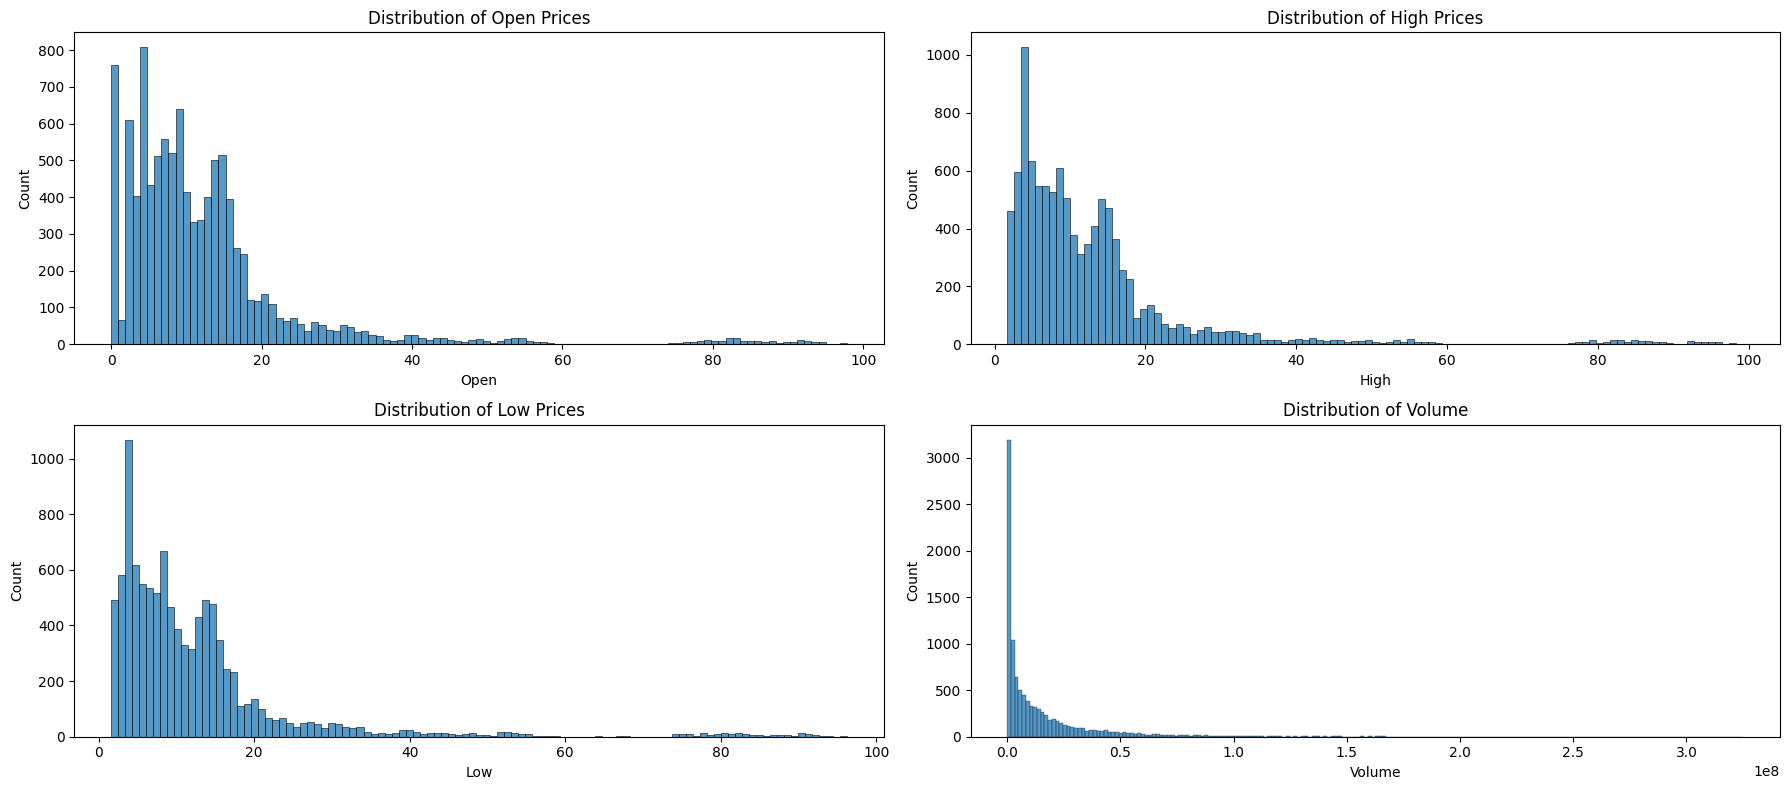

In [ ]:
fig, axis = plt.subplots(2,2,figsize=(18,8))

sns.histplot(data['Open'], ax = axis[0,0])
axis[0,0].set_title('Distribution of Open Prices')

sns.histplot(data['High'],ax = axis[0,1])
axis[0,1].set_title('Distribution of High Prices')

sns.histplot(data['Low'],ax = axis[1,0])
axis[1,0].set_title('Distribution of Low Prices')

sns.histplot(data['Volume'],ax = axis[1,1])
axis[1,1].set_title('Distribution of Volume')

plt.tight_layout()
plt.show()

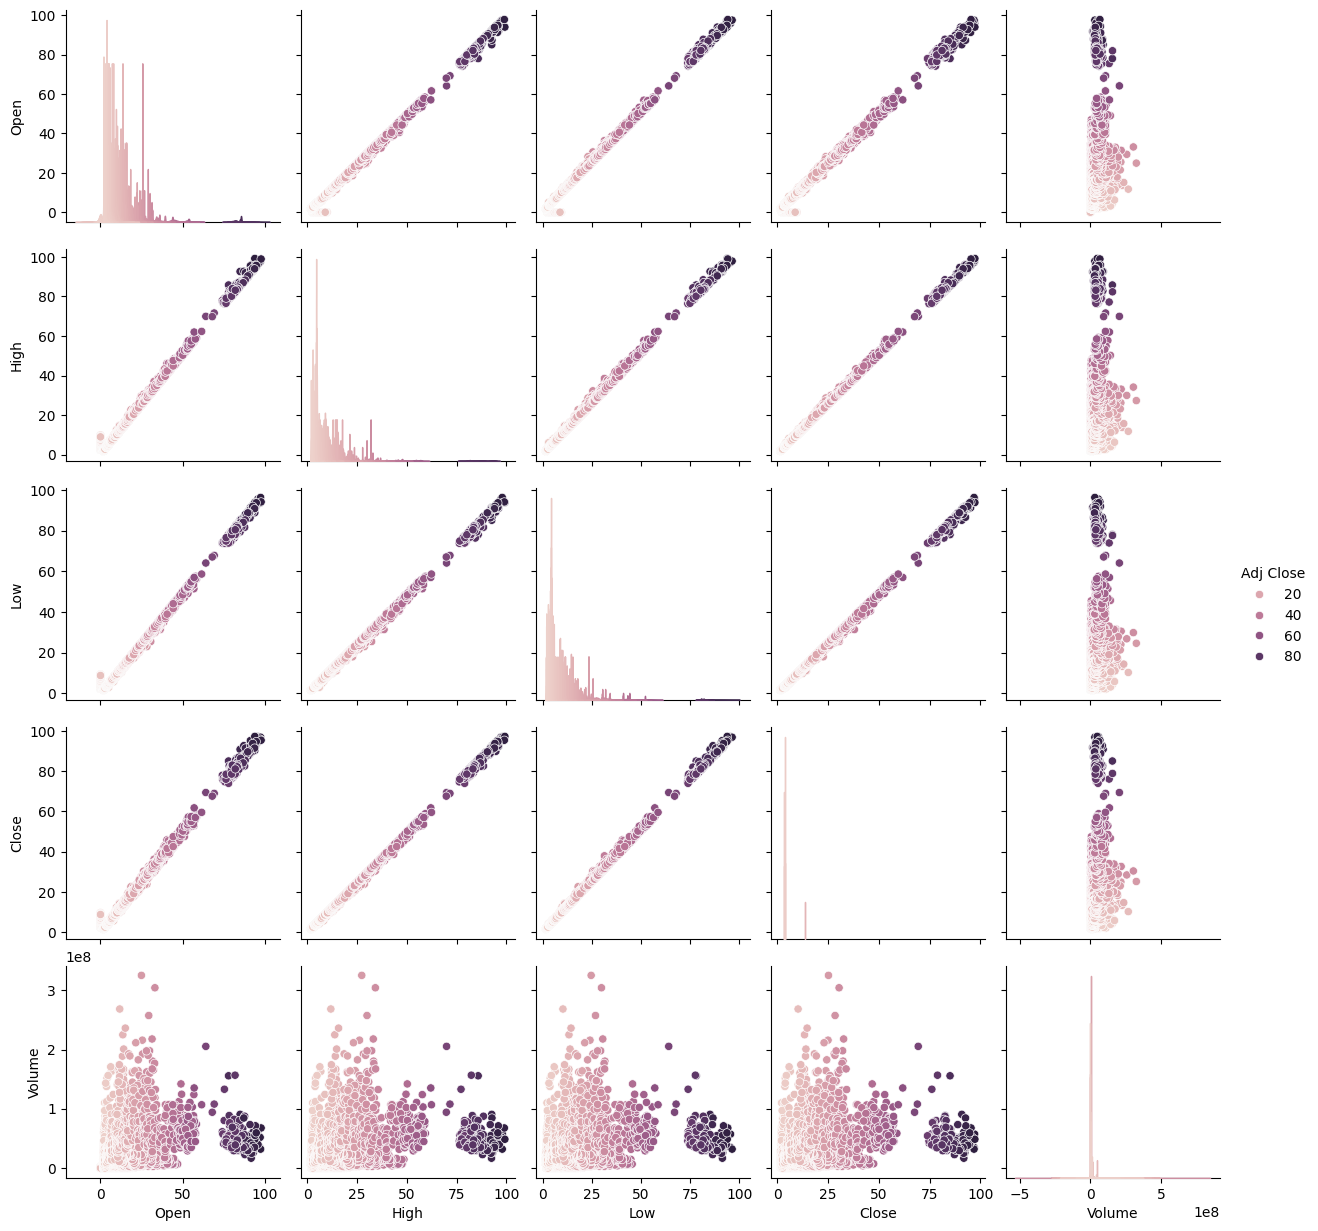

In [ ]:
sns.pairplot(data, hue='Adj Close')

<Axes: >

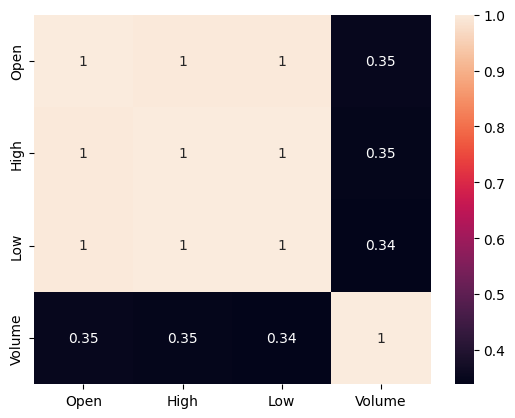

In [ ]:
sns.heatmap(Independent_feature.corr(),annot=True)

### Model Building

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

##### Random Forest Regression

In [ ]:
parameters =  {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'] ,
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
X = Independent_feature
y = Target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
rf = RandomForestRegressor(oob_score=True, n_estimators=100)

In [ ]:
gridCv = GridSearchCV(rf,parameters,cv = 6)

In [ ]:
gridCv.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=6, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2']})

In [ ]:
gridCv.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'log2'}

In [ ]:
y_pred = gridCv.predict(X_test)

In [ ]:
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

In [ ]:
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Mean Squared Error: 0.10508728724486732
Mean Absolute Error: 0.1668582646701836
R2 Score: 0.9994233152207951


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the ANN model
model = Sequential()

model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 154.4812 - mae: 7.6749 - val_loss: 1.8069 - val_mae: 0.9238
Epoch 2/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9524 - mae: 0.6735 - val_loss: 0.1987 - val_mae: 0.2892
Epoch 3/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1887 - mae: 0.2744 - val_loss: 0.1714 - val_mae: 0.2348
Epoch 4/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1617 - mae: 0.2341 - val_loss: 0.2771 - val_mae: 0.3322
Epoch 5/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1625 - mae: 0.2475 - val_loss: 0.1334 - val_mae: 0.2218
Epoch 6/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1357 - mae: 0.2121 - val_loss: 0.1800 - val_mae: 0.3165
Epoch 7/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1454 - mae: 0.2294 - val_loss: 0.1271 - val_mae: 0.2136
Epoch 8/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1748 - mae: 0.2435 - val_loss: 0.1490 - val_mae: 0.2350
Epoch 9/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2486 - mae: 0.2389
Mean Absolute Error on Test Set: 0.2412594109773636


In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared on Test Set: {r2}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R-squared on Test Set: 0.998673141002655


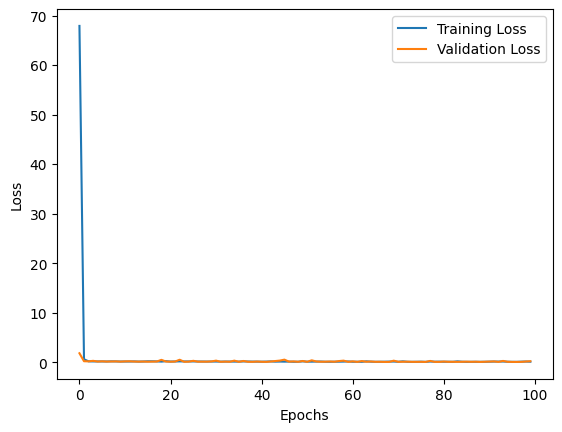

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Showing the Up-trend and Down-trend for the stocks

In [ ]:
# Create a DataFrame for plotting
predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})

In [ ]:
predictions_df.head()

,Actual,Predicted
0,10.15625,10.027524
1,2.55000,2.585402
2,8.68750,8.713970
3,14.56250,14.559744
4,7.39000,7.443102


In [ ]:
# Calculate the difference between actual and predicted values
predictions_df['Difference'] = predictions_df['Actual'] - predictions_df['Predicted']

In [ ]:
predictions_df.head()

,Actual,Predicted,Difference
0,10.15625,10.027524,0.128726
1,2.55000,2.585402,-0.035402
2,8.68750,8.713970,-0.026470
3,14.56250,14.559744,0.002756
4,7.39000,7.443102,-0.053102


In [ ]:
# Create a new column to indicate the trend
predictions_df['Trend'] = 0
predictions_df.loc[predictions_df['Difference'] > 0, 'Trend'] = 1  # 1 for upward trend
predictions_df.loc[predictions_df['Difference'] < 0, 'Trend'] = -1  # -1 for downward trend

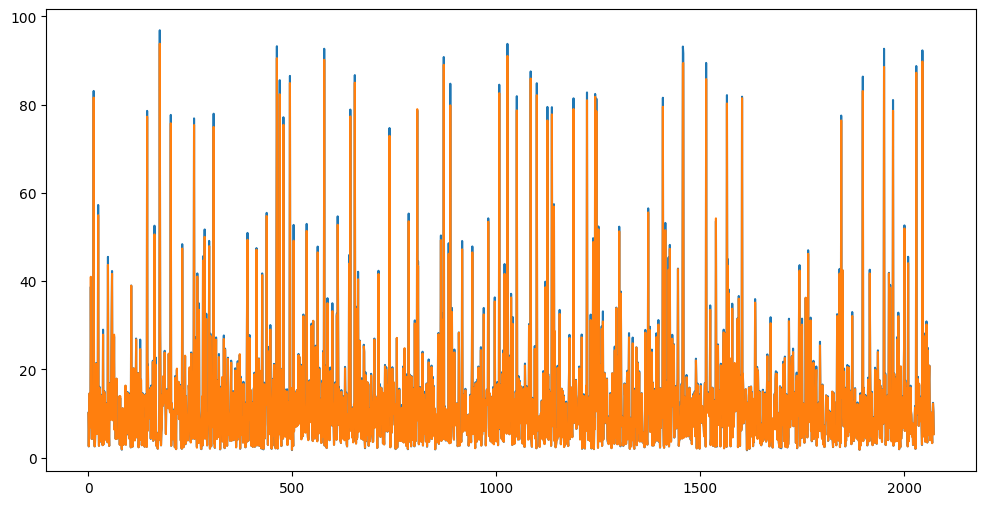

In [ ]:
# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Actual'], label='Actual')
plt.plot(predictions_df['Predicted'], label='Predicted')

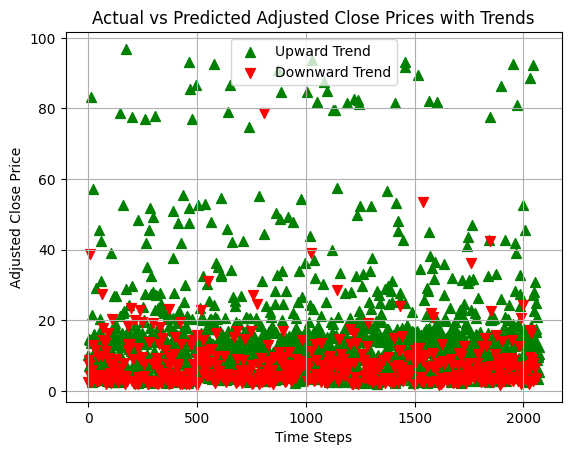

In [ ]:
# Highlight upward and downward trends
upward_indices = predictions_df.index[predictions_df['Trend'] == 1].tolist()
downward_indices = predictions_df.index[predictions_df['Trend'] == -1].tolist()

plt.scatter(upward_indices, predictions_df['Actual'][upward_indices], color='green', label='Upward Trend', marker='^', s=50)
plt.scatter(downward_indices, predictions_df['Actual'][downward_indices], color='red', label='Downward Trend', marker='v', s=50)


plt.xlabel('Time Steps')
plt.ylabel('Adjusted Close Price')
plt.title('Actual vs Predicted Adjusted Close Prices with Trends')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions_df

,Actual,Predicted,Trend
2023-01-01,100.496714,93.419860,0.0
2023-01-02,100.358450,98.255223,-1.0
2023-01-03,101.006138,99.292566,1.0
2023-01-04,102.529168,98.517782,1.0
2023-01-05,102.295015,101.488586,-1.0
...,...,...,...
2023-04-06,89.287646,91.214233,-1.0
2023-04-07,89.583767,85.164479,1.0
2023-04-08,89.844822,90.613447,1.0
2023-04-09,89.849935,90.140979,1.0


<ipython-input-68-e94ff0a65136>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_actual = predictions_df['Actual'][i]
<ipython-input-68-e94ff0a65136>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_val = predictions_df['Trend'][i]


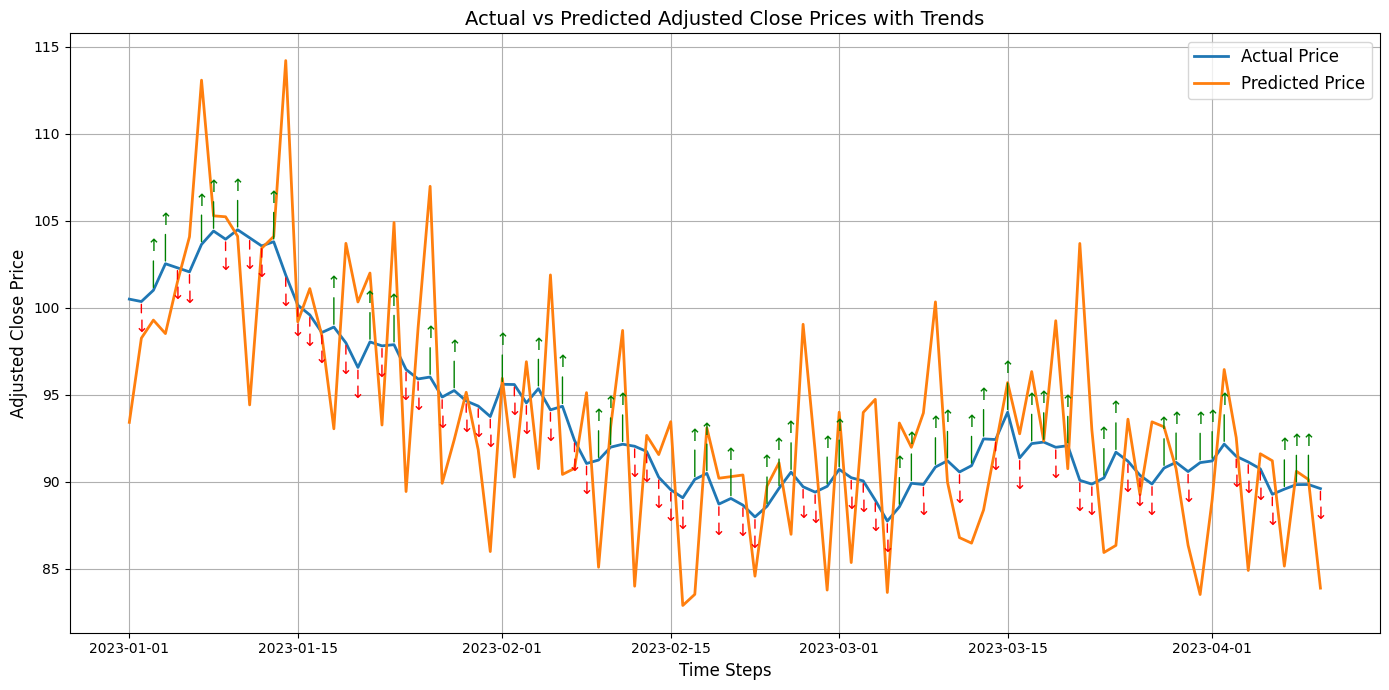

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Price', linewidth=2)
plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Price', linewidth=2)


for i in range(len(predictions_df)):
    x = predictions_df.index[i]
    y_actual = predictions_df['Actual'][i]
    trend_val = predictions_df['Trend'][i]

    if trend_val == 1:  # Upward trend
        color = 'green'
        arrow_style = '↑'  # Up arrow character
        y_offset = 2
    elif trend_val == -1:  # Downward trend
        color = 'red'
        arrow_style = '↓'  # Down arrow character
        y_offset = -2
    else:
        continue

    plt.annotate(arrow_style, xy=(x, y_actual), xytext=(x, y_actual + y_offset),
                 arrowprops=dict(arrowstyle='-', color=color, linewidth=1),
                 fontsize=12, ha='center', va='bottom', color=color)



plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.title('Actual vs Predicted Adjusted Close Prices with Trends', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()